## Tic-Tac-Toe Agent Training


## Rules

1. The game will be played on a 3x3 grid (9 cells) using numbers from 1 to 9. Each number can be used exactly once in the entire grid.

2. There are two players: one is the Reinforcement Learning (RL) agent and other is the environment.

3. The RL agent is given odd numbers {1, 3, 5, 7, 9} and the environment is given the even numbers {2, 4, 6, 8}

4. Each of them takes a turn. The player with odd numbers always goes first.

5. At each round, a player puts one unused number on a blank spot.

6. The objective is to make 15 points in a row, column or a diagonal. The player can use the opponent's numbers in the grid to make 15.

7. The game terminates when any one of the players makes 15.


## Reward Structure:

+10 if the agent wins (makes 15 points first)

-10 if the environment wins

0 if the game ends in a draw (no one is able to make 15 and the board is filled up)

-1 for each move agent takes

### Note:
There is one drawback in this implementation, the Agent learns to only play Odd Values.<br>
We can implement an Even Value agent by switching around some values.<br>
If we want an agent to learn both, training will take twice as long but its certainly possible.<br>

#### Importing libraries

In [114]:
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output

#### Import the Environment

In [115]:
from TCGame_Env import TicTacToe

In [116]:
# Function to convert state array into a string to store it as keys in the dictionary.
# States in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x
#
# np.nan's to be replaces with x to mark empty spots

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [50]:
# Function will return all valid (all possible actions) actions corresponding to a state

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] # Switch 0 for 1 for Even Agent
    return valid_Actions

In [117]:
#Function will add new Q-values to the Q-dictionary. 

def add_to_dict(state):
    state_repr = Q_state(state)
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys(): # If unseen state,create empty dict as placeholder.
        Q_dict[state_repr]=dict()
        for action in valid_act:
            Q_dict[state_repr][action]=0  # Initialise all possible actions for unseen state with 0 Q-Value

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [52]:
# Function to return action based on a epsilon-greedy policy.
#
# During inital training episodes, epsilon takes on higher values. This causes it to trigger the else condition,
# and randomly choose a possible action. ( Exploration )
# As the episodes progress, the Decay Rate decreases making the Epislon value Smaller and Smaller.
# This results in the agent choosing the action with max expected reward value for current state. ( Exploitation )
#


def epsilon_greedy(state,time):
    epsilon = MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) * np.exp(-DECAY_RATE * time) # Epsilon Value with Iteration based Decay
    
    z=np.random.random()
    
    # Choose Exploitation
    if z > epsilon:
        q_state = Q_state(state)
        action=max(Q_dict[q_state],key=Q_dict[q_state].get)
    
    # Choose Exploration
    else:
        possible_actions = valid_actions(state)
        action=random.choice(possible_actions)
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [53]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence check)
Q_dict = dict()
States_track = dict()

In [93]:
# Initialise states to be tracked for convergence check
def initialise_tracking_states():
    #select sample of Q-values
    sample_q_values = [('x-x-x-x-x-x-x-x-x',(2,9)),('x-2-x-x-1-x-x-x-x',(6,5)),('4-x-x-7-x-x-x-x-x',(1,1))]    
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state]={action:[]} #Initialise as empty list. Q_Values will be appened to this list for tracking.
  
  

In [94]:
# Function will save the Q-dictionary as a pickle file. 
# Used to Save the Policy at end of training so that can be references later for playing.

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [95]:
# Helper Function to Save Tracking state for Convergence Check
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action]) # Append to tracked state current policy Q Value

In [96]:
# Initalise Tracking States for Convergence Check
initialise_tracking_states()

#### Hyperparameters for Reinforcement Learning

In [104]:
MIN_EPSILON = 0.001          # Min Epsilon Value
MAX_EPSILON = 1.0            # Max Epsilon Value
DECAY_RATE = 0.000001        # Decay Rate

EPISODES = 5000000           # Number of Episodes to Train on
LR = 0.01                    # Learning rate
GAMMA = 0.8                  # Discount Factor

THRESHOLD = 200              # Number of episodes after which states_tracked will be saved
POLICY_THRESHOLD = 30000     # Number of episodes after which Q dictionary/table will be saved

### Q-update loop ---write your code here

In [105]:
start_time = time.time() # For checking how long it took to train

for episode in range(EPISODES):
    
    # Initialise Environment. (env variable used in valid_actions function. If you change this, make sure to change it there too.)
    env = TicTacToe() 
    print(f"Start of {episode}")
    
    curr_state=env.state # Get Current State of Environment
    terminal_s = False   # Game reached Terminal State (Win ( Agent or ENV ) / Tie)
    
    add_to_dict(curr_state) # Check Q dict and Initialise if Unseen State
    while_loop=0  # To Count Number of Steps Taken per Episode
    episode_reward=0 # To Count Total Reward Accumalated per Episode
    while not terminal_s:
        
        clear_output(wait=True) # Clear previous Printed output (Else too long output for large number episodes, Notebook gets stuck.)
        
        print(f"Start of {episode}:{while_loop}")
        while_loop+=1
        
        
        # Switch let Environment Take first Step for Even Agent
        
        curr_state_repr = Q_state(curr_state) # Get Current State's String Representation
        curr_action = epsilon_greedy(state=curr_state,time=episode)  # Get Action to take based on Epsilon Policy
        
        print(f"State : {curr_state}")
        print(f"Action : {curr_action}")
       
        # Take Current Action, gets a new state
        # Check's Win/Tie,if true, returns terminal_s=True and returns 10 reward if win, 0 reward if tie and new state
        # Environment Takes random Action based on new state, get another new state
        # Check's Loss (Env Win)/Tie,if true, returns terminal_s=True and returns -10 reward if Loss (Env Win), 0 reward if tie and new state
        # Else returns the latest state, reward=-1 and terminal_s=False
        
        next_state,reward,terminal_s=env.step(curr_state,curr_action) 
        
        next_state_repr = Q_state(next_state) # Get Next State's String Representation
        add_to_dict(next_state) # Check Q dict and Initialise if Unseen State
        
        episode_reward+=reward # Add current reward to Episode Reward
        
        print(f"Next State : {next_state}")
        print(f"Episode Reward {episode_reward}")
        
        if not terminal_s: # If not Win/Loss/Tie
            
            # Get action for next state with Max Q Value (Excepted Reward)
            max_action_next = max(Q_dict[next_state_repr],key=Q_dict[next_state_repr].get) 
            # Update Q_dict(Current State,Action pair) with Learning Rate and discount adjusted Excepted Reward Value
            Q_dict[curr_state_repr][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_repr][max_action_next])))-Q_dict[curr_state_repr][curr_action]) 
        
        else: # # If Win/Loss/Tie
            
            # Update Q_dict(Current State,Action pair) with Learning Rate adjusted Excepted Reward Value
            Q_dict[curr_state_repr][curr_action] += LR * (reward - Q_dict[curr_state_repr][curr_action])
        
        curr_state=next_state # Update Current State with Next State
        
    
    
    if ((episode+1)%THRESHOLD)==0:   # Save Tracking State for Convergence Check
        save_tracking_states()
        save_obj(States_track,'States_tracked')

    if ((episode+1)% POLICY_THRESHOLD) == 0:   # Save Policy
        save_obj(Q_dict,'Policy')  
        
# Training Complete

elapsed_time = time.time() - start_time   # Check Training Time
save_obj(States_track,'States_tracked')   # Save Final Tracking States for Convergence Check
save_obj(Q_dict,'Policy')                 # Save Final Policy

#### Check the Q-dictionary for Starting State

In [132]:
Q_dict['x-x-x-x-x-x-x-x-x']

{(0, 1): -1.1849665875744966,
 (0, 3): -1.271710458652615,
 (0, 5): -1.1555438513321172,
 (0, 7): -1.2813684529098248,
 (0, 9): -1.2405611950876185,
 (1, 1): -1.2706465903711175,
 (1, 3): -1.2734001079387551,
 (1, 5): -1.2385369263810133,
 (1, 7): -1.268140315307584,
 (1, 9): -1.1506003320601286,
 (2, 1): -1.2830317941037583,
 (2, 3): -1.2691219050657134,
 (2, 5): -1.1269209054433003,
 (2, 7): -1.2711066729782945,
 (2, 9): -1.2370071031992067,
 (3, 1): -1.2832792016143528,
 (3, 3): -1.2791758149292338,
 (3, 5): -1.2364947627374439,
 (3, 7): -1.2820659327677344,
 (3, 9): 4.354612975828129,
 (4, 1): -1.1705204601008516,
 (4, 3): -1.274971826916757,
 (4, 5): -1.1713961664729073,
 (4, 7): -1.2782617498066617,
 (4, 9): -1.1800888904287656,
 (5, 1): -0.6332118259585299,
 (5, 3): -1.2623335954137687,
 (5, 5): -0.5301670639866655,
 (5, 7): -1.2754346170107904,
 (5, 9): -1.284172079444266,
 (6, 1): -1.0340564381311603,
 (6, 3): -1.2732942416205357,
 (6, 5): 0.8722706739069718,
 (6, 7): -1.27416

#### Check Q_Dict Length

In [133]:
len(Q_dict)

2784174

If all states a visited atleast once, the len should be $9**10$ <br>
Permutation formula is $(nPr)=n**r$ <br>
n=9 for 9 spaces <br>
r=10 for 10 possible values for a spot ( 9 number and 1 blank ) <br>
Devided by 2 because only Agents Action States tracked, not Environments.

In [134]:
#Remaining Unseen States
(9**10)/2 -  len(Q_dict)

1740608026.5

#### Check the states tracked for Q-values convergence <br>
Convergence is achived when Each state-action pair must be visited infinitely often. This has a precise mathematical definition: each action must have a non-zero probability of being selected by the policy in every state, i.e. π(s, a) > 0 for all (s, a). In practice, using an ε-greedy policy (where ε > 0) ensures that this condition is satisfied.

In our case we are trying to see if the values approximately flatline after a large number of iterations.

<function matplotlib.pyplot.show(close=None, block=None)>

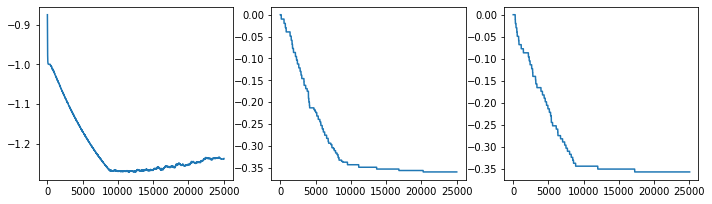

In [135]:
plt.figure(0, figsize=(16,7))

# X-Axis = Number of times a State was visited
# Y-Axis = Q-Value for that timestep

xaxis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2,9)])))
plt.subplot(242)
plt.plot(xaxis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2,9)]))
plt.show

xaxis = np.asarray(range(0, len(States_track['x-2-x-x-1-x-x-x-x'][(6,5)])))
plt.subplot(243)
plt.plot(xaxis,np.asarray(States_track['x-2-x-x-1-x-x-x-x'][(6,5)]))
plt.show

xaxis = np.asarray(range(0, len(States_track['4-x-x-7-x-x-x-x-x'][(1,1)])))
plt.subplot(244)
plt.plot(xaxis,np.asarray(States_track['4-x-x-7-x-x-x-x-x'][(1,1)]))
plt.show



In [136]:
# What a tracked state looks like
States_track['x-x-x-x-x-x-x-x-x'][(2,9)]

[-0.8751221877410486,
 -0.8800428718065222,
 -0.881242443088457,
 -0.8859219646734239,
 -0.8881921175764228,
 -0.8968298696984233,
 -0.9066947834789314,
 -0.9103713812976754,
 -0.9139031064927355,
 -0.9181227109472916,
 -0.920554548309446,
 -0.9252036842731474,
 -0.9295807534948385,
 -0.9309820965002912,
 -0.9350210139017504,
 -0.9388235744602944,
 -0.9394353387156915,
 -0.9406405754752493,
 -0.9446731373287796,
 -0.9463164004769775,
 -0.9494579567006812,
 -0.9524156695235255,
 -0.9547477751857195,
 -0.9573959286211237,
 -0.9594839520334592,
 -0.9618549451073231,
 -0.9640871880207332,
 -0.9655022961048362,
 -0.9665269124082264,
 -0.9678458856169618,
 -0.9688008949682525,
 -0.9697275395868004,
 -0.9723455852887762,
 -0.9739639175060798,
 -0.9752399446099064,
 -0.9764534336890481,
 -0.9773812623524991,
 -0.9791286798411115,
 -0.9801515822006198,
 -0.9811243521665315,
 -0.9822289522577055,
 -0.9827567701466995,
 -0.9830999104207802,
 -0.9839281829677433,
 -0.9844055320054184,
 -0.98516981

### Epsilon - decay check

In [137]:
max_epsilon = MAX_EPSILON
min_epsilon = MIN_EPSILON

time = np.arange(0,EPISODES)

epsilon = []
for i in range(0,EPISODES):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-DECAY_RATE*i))

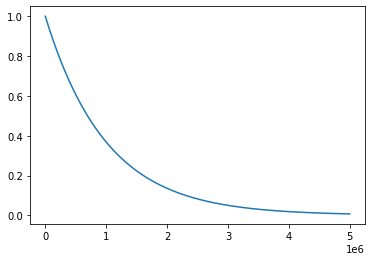

In [138]:
plt.plot(time, epsilon)
plt.show()